# Task 1: Extraction of LBP & HOG features from Digit MNIST dataset and classification using ANN multiclass classification.

### Step 1: Import required packages

we will need tensorflow, numpy, os and keras


In [0]:
import tensorflow as tf
import os
import numpy as np
from skimage import feature
from sklearn import metrics
from sklearn.metrics import accuracy_score
import seaborn as sns
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)

2.2.0-rc3
2.3.0-tf


##  Mount the Google Drive to access the Digit MNIST Dataset

In [0]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


## Step 2. Dataset preparation

In [0]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [0]:
cd /content/gdrive/My Drive/42028-DL-CNN-2020/Assignment-1/data

/content/gdrive/My Drive/42028-DL-CNN-2020/Assignment-1/data


In [0]:
ls

t10k-images-idx3-ubyte.gz  train-images-idx3-ubyte.gz
t10k-labels-idx1-ubyte.gz  train-labels-idx1-ubyte.gz


In [0]:
train_images, train_labels = load_mnist('/content/gdrive/My Drive/42028-DL-CNN-2020/Assignment-1/data', kind='train')
test_images, test_labels = load_mnist('/content/gdrive/My Drive/42028-DL-CNN-2020/Assignment-1/data', kind='t10k')

In [0]:
train_images=train_images.reshape(-1,28,28)
test_images=test_images.reshape(-1,28,28)

In [0]:
print(train_images.shape)
print(train_images.dtype)

(60000, 28, 28)
uint8


In [0]:
class_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

3


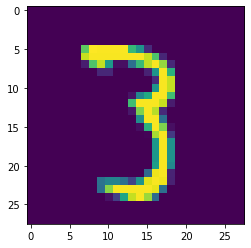

In [0]:
## Show an image from the dataset
import matplotlib.pyplot as plt
plt.imshow(train_images[356])
print(train_labels[356])

## Step 3: Normalize the dataset and split the small part of the training set into validation set


- Validation set: first 5000 samples 
- Training set: 5000 to remaining

In [0]:
#Using slicing to split the training to train and validation

valid_images= train_images[:5000] / 255.0
valid_labels = train_labels[:5000]

train_images  = train_images[5000:] / 255.0
train_labels=train_labels[5000:]

test_images = test_images / 255.0

In [0]:
print(np.shape(train_images))
print(np.shape(valid_images))
print(np.shape(test_images))

print(np.shape(valid_labels))
print(np.shape(train_labels))

(55000, 28, 28)
(5000, 28, 28)
(10000, 28, 28)
(5000,)
(55000,)


## Raw Input Data

### Step 4: Defining the model

In [0]:
#define the model with 3 layers
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=[28,28]), 
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

### Step 5: Training the model

In [0]:
# Train and fit the model with given dataset
model.compile(optimizer = tf.optimizers.Adam(),       
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

H=model.fit(train_images, train_labels, epochs=10,validation_data=(valid_images, valid_labels))

Epoch 1/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2086 - accuracy: 0.9387 - val_loss: 0.0978 - val_accuracy: 0.9710
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0837 - accuracy: 0.9740 - val_loss: 0.0854 - val_accuracy: 0.9758
Epoch 3/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0536 - accuracy: 0.9832 - val_loss: 0.0706 - val_accuracy: 0.9802
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0386 - accuracy: 0.9872 - val_loss: 0.0719 - val_accuracy: 0.9800
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0266 - accuracy: 0.9913 - val_loss: 0.0780 - val_accuracy: 0.9762
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0211 - accuracy: 0.9932 - val_loss: 0.0765 - val_accuracy: 0.9804
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0179 - accuracy: 0.9938 - val_loss: 0.0684 - val_accuracy:

In [0]:
type(H)
print(H.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [0]:
#Different model with SGD as optimizer
model1 = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=[28,28]), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model1.compile(optimizer = tf.optimizers.SGD(0.01),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

H=model1.fit(train_images, train_labels, epochs=10,validation_data=(valid_images, valid_labels))

Epoch 1/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6799 - accuracy: 0.8267 - val_loss: 0.3674 - val_accuracy: 0.9012
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3507 - accuracy: 0.9027 - val_loss: 0.2951 - val_accuracy: 0.9204
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3004 - accuracy: 0.9156 - val_loss: 0.2663 - val_accuracy: 0.9282
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2702 - accuracy: 0.9243 - val_loss: 0.2384 - val_accuracy: 0.9350
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2467 - accuracy: 0.9313 - val_loss: 0.2206 - val_accuracy: 0.9374
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2277 - accuracy: 0.9368 - val_loss: 0.2025 - val_accuracy: 0.9458
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2115 - accuracy: 0.9408 - val_loss: 0.1901 - val_accuracy:

### Summary of the model

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


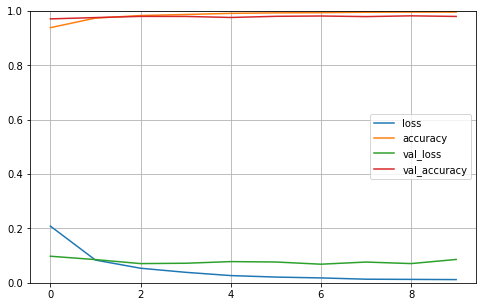

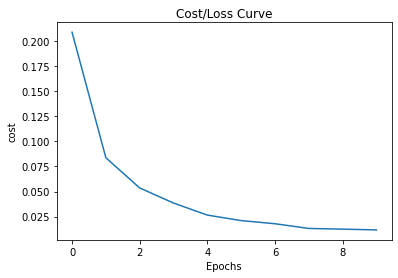

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(H.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

plt.plot(H.history['loss'])
plt.ylabel('cost')
plt.xlabel('Epochs')
plt.title("Cost/Loss Curve")
plt.show()

### Step 6: Evaluation on test dataset

In [0]:
# Accuracy for model
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0859 - accuracy: 0.9796


[0.0858682245016098, 0.9796000123023987]

In [0]:
model1.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.1696 - accuracy: 0.9509


[0.16963833570480347, 0.9509000182151794]

In [0]:
predictions=[]
predict_label=[]
# Exract LBP features for each test sample and classify it with the trained SVM classifier

## WRITE YOUR CODE HERE (~ 2 lines)
for im_index in range(len(test_images)):
  imag = test_images[im_index]
  
  # Perform classification, Hint: use model.predict()
  prediction = model.predict_classes(imag.reshape(1,-1))
## END YOUR CODE HERE 
  
  # Store the classfication result
  predictions.append(prediction)
  predict_label.append(test_labels[im_index])

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [0]:
accuracy = metrics.accuracy_score(predict_label, predictions)
print("Accuracy on test dataset:",accuracy)

Accuracy on test dataset: 0.9796


[[ 970    1    1    1    2    0    2    1    1    1]
 [   0 1132    0    1    0    1    0    1    0    0]
 [   2    2 1006    6    3    0    1    6    5    1]
 [   0    0    1  995    0    3    0    3    0    8]
 [   1    0    1    0  951    0    3    2    1   23]
 [   2    0    0   10    1  873    2    1    1    2]
 [   5    2    0    2    6    6  936    0    1    0]
 [   1    4    4    3    0    0    0 1012    1    3]
 [   5    1    2    5    6    8    1    4  933    9]
 [   1    2    0    3    5    1    0    9    0  988]]


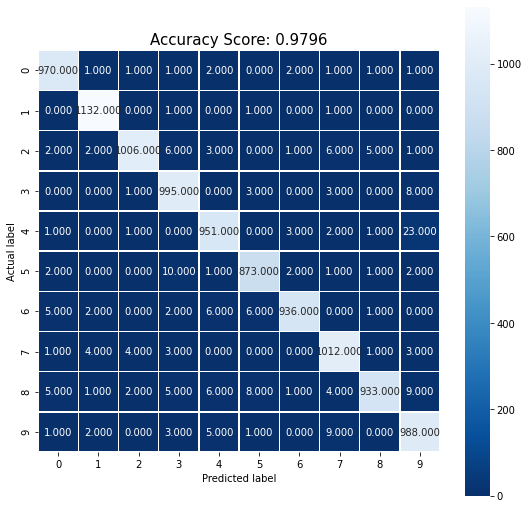

In [0]:
# plot the confusion matrix
cm  = metrics.confusion_matrix(predict_label, predictions)
print(cm)

# Plot confusion matrix using seaborn library
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

4
1
0
9


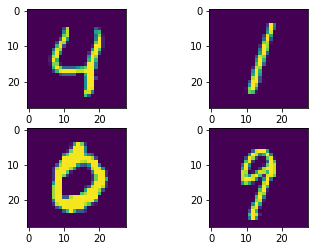

In [0]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(test_images[4])
print(test_labels[4])
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(test_images[2])
print(test_labels[2])
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(test_images[3])
print(test_labels[3])
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(test_images[426])
print(test_labels[426])